# 📘 Stock Daily Price Data

You can see the data of the last few days of the Year 2019. If you want to visualise the full data, then you can use `matplotlib` to plot the close price series for the entire year of 2019. 

## Plot the Close Price

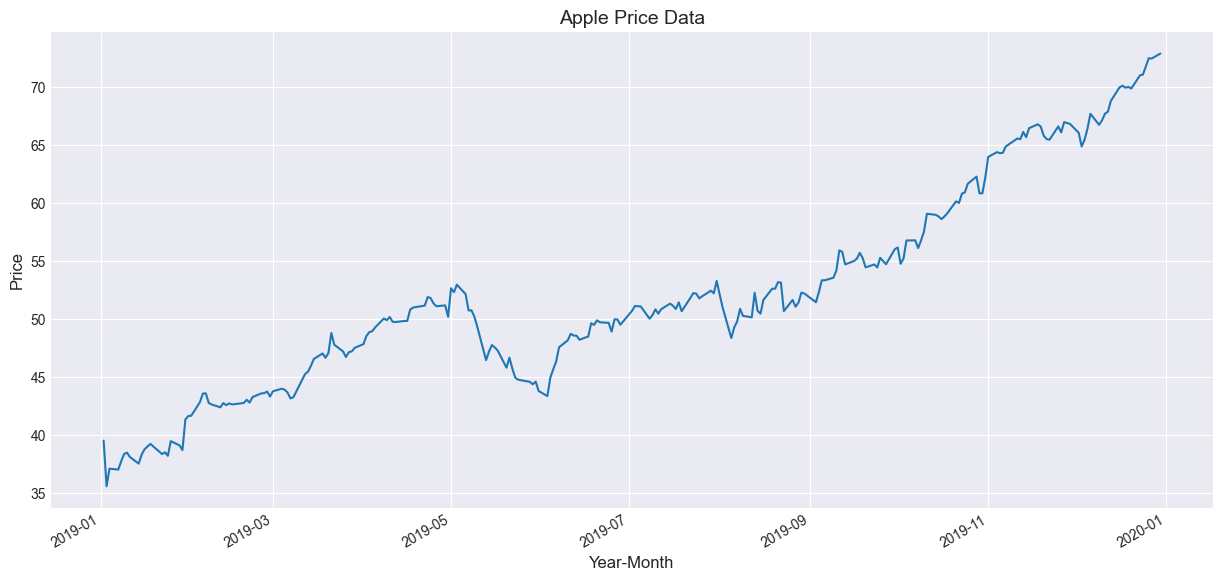

In [5]:
# Libraries for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Plot the close price
plt.figure(figsize=(15, 7))
price_data_apple['Close'].plot()

# Set the title and axes label
plt.title('Apple Price Data', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.show()

The last 5 rows of the price data for the Apple stock has been printed below. Do you find something interesting in the data?

In [ ]:
price_data_apple.tail()

In the data, you can see both the **Close** and the **Adjusted Close** prices. The adjusted prices are adjusted for corporate actions such as stock splits, dividends, and rights offerings. 



<a id='adjusted-daily-data'></a> 
## Adjusted Daily Price Data

To download the adjusted dataset, you simply need to define the `auto_adjust` parameter to be `True` in the `download()` method.

Syntax:

```python
yf.download(ticker, start, end, auto_adjust=True)
```

Returns:
A `pandas` dataframe containing the adjusted open, high, low and close price along with the volume for all trading days between the start and the end date.

# 📘 Stock Index Data

<a id='multiple-asset'></a> 
## Data for Multiple Assets

Downloading data for multiple assets is as simple as downloading the data for a single asset. This can be done by simply extending the list of tickers in the `download()` method.

Syntax:
```python
import yfinance as yf
yf.download(ticker_list, start, end)[column_name]
```

Parameters:
1. **ticker_list:** List of all tickers
2. **start:** Start date
3. **end:** End date, if not specified, data is downloaded till current data
4. **column_name:** The column to extract from the dataframe

Returns:
A `pandas` dataframe containing the open, high, low, close and adjusted close price along with the volume for all trading days between the start and the end date.

After downloading the data, you can use the `matplotlib` package to visualise the data.

## Plot the Series

Since you will be visualising the price of three different assets, you can divide the entire price series by its respective first price value. This will make the changes comparable.
As you have seen, Apple, Microsoft and Amazon have different price ranges.
If you try to plot them as it is, you will find that these prices will be graphed at different magnitudes and you wouldn't observe much from that.

Hence, one way is to divide it by the first price so that we can compare them on the same scale. This helps us to compare a 100+ stock with a stock whose price is in the 1000s.

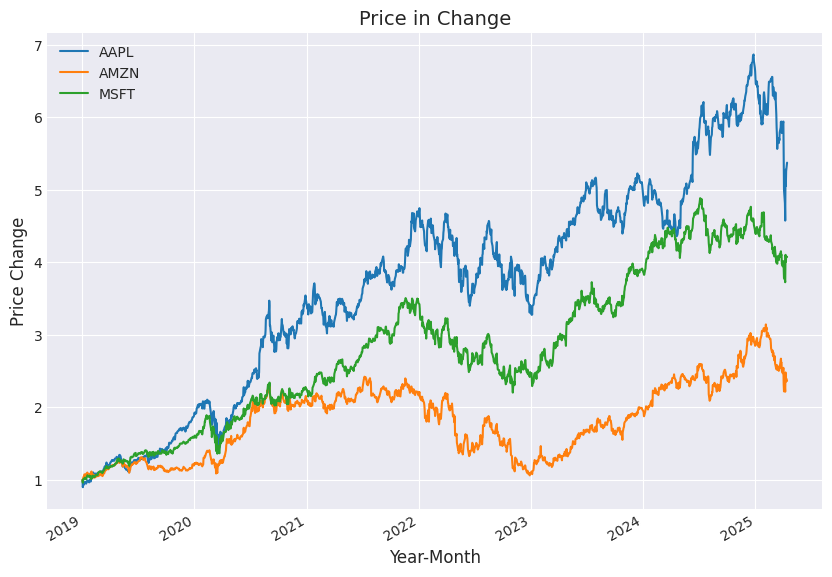

In [3]:
# Plot the absolute price series
plt.figure(figsize=(10,7))
(price_data['AAPL']/price_data['AAPL'].iloc[0]).plot()
(price_data['AMZN']/price_data['AMZN'].iloc[0]).plot()
(price_data['MSFT']/price_data['MSFT'].iloc[0]).plot()
# Set the title and axes label
plt.title('Price in Change', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price Change', fontsize=12)
plt.legend()
# Show the plot
plt.show()

<a id='snp-500'></a> 
## Data for Assets Constituting S&P 500

To download the data for all the assets that make up the S&P 500, you will first need the ticker of all the assets. You can read this information from a web source by using the `read_html` method of pandas.

Syntax:
```python
pandas.read_html(url)
```

Parameters:<br>
    **url:** url of the website (in string format)

Returns:
The above method will return a list of dataframes. You can use a proper index to extract the desired data.

You will now read the information from wikipedia

In [4]:
# url of the source
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(url)[0]

tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In the above dataframe, you can see that the tickers of the assets are stored in the column `Symbol`. You will extract this column, convert it into a list, and pass it as tickers' list into `yf.download()`.

Syntax to convert a column of a dataframe to a list:
```python
DataFrame[column].tolist()
```

Parameter:
**column:** The column to be converted into a list

# 📘 Minute Price Data and Resampling Techniques

<a id='resample-data'></a> 
## Resample Data

During strategy modelling, you might be required to work with a custom frequency of stock market data such as 15 minutes or 1 hour or even 1 month. If you have minute level data, then you can easily construct the 15 minutes, 1 hour or daily candles by resampling them. Thus, you don't have to buy them separately.

In this case, you can use the pandas `resample()` method to convert the stock data to the frequency of your choice.

The first step is to define the dictionary with the conversion logic. For example, to get the open value the first value will be used, to get the high value the maximum value will be used and so on. The names `Open`, `High`, `Low`, `Close` and `Volume` should match the column names in your dataframe.

In [3]:
# Aggregate function
ohlcv_dict = {'Open': 'first',
              'High': 'max',
              'Low': 'min',
              'Close': 'last',
              'Volume': 'sum'
             }

You can now use the `resample()` method to resample the data to the desired frequency.

Syntax:
```python
DataFrame.resample(interval).agg(aggregate)
```

Parameters:
1. **interval:** Resampling interval such as 15T for 15 minutes (H is for hour, D is for days, M is for months)
2. **aggregate:** Dictionary with aggregating values to be used while resampling

Returns: <br>
Resampled dataframe

### Resample minute data to 15 minutes data

In [4]:
# Resample data to 15 minutes data
apple_minute_data_15M = apple_minute_data.resample('15T').agg(ohlcv_dict)

# Drop the missing values
apple_minute_data_15M.dropna(inplace=True)

# Display the first 5 rows
apple_minute_data_15M.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2025-04-08 13:30:00+00:00,186.729996,187.520004,185.100006,186.330002,11828895
2025-04-08 13:45:00+00:00,186.997498,188.559998,185.257294,188.000000,5180120
2025-04-08 14:00:00+00:00,188.000000,189.570007,187.779999,189.285004,4673625
2025-04-08 14:15:00+00:00,189.270004,190.335007,189.220001,189.330002,3654037
2025-04-08 14:30:00+00:00,189.320007,189.929993,188.600006,188.630005,2533728


### Resample minute data to 1 hour data

In [5]:
# Resample data to 1 hour data
apple_minute_data_1H = apple_minute_data.resample('1H').agg(ohlcv_dict)

# Drop the missing values
apple_minute_data_1H.dropna(inplace=True)

# Display the first 5 rows
apple_minute_data_1H.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2025-04-08 13:00:00+00:00,186.729996,188.559998,185.100006,188.000000,17009015
2025-04-08 14:00:00+00:00,188.000000,190.335007,186.179993,186.199997,14173356
2025-04-08 15:00:00+00:00,186.214996,186.940002,183.029999,184.470001,9988049
2025-04-08 16:00:00+00:00,184.470001,184.868195,178.940903,179.168503,11863108
2025-04-08 17:00:00+00:00,179.149994,179.600006,174.850006,178.145004,14867061


### Resample minute data to 4 hours data

In [6]:
# Resample data to 4 hours data
apple_minute_data_4H = apple_minute_data.resample('4H').agg(ohlcv_dict)

# Drop the missing values
apple_minute_data_4H.dropna(inplace=True)

# Display the first 5 rows
apple_minute_data_4H.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2025-04-08 12:00:00+00:00,186.729996,190.335007,183.029999,184.470001,41170420
2025-04-08 16:00:00+00:00,184.470001,184.868195,169.210098,172.770004,62287294
2025-04-09 12:00:00+00:00,172.179001,180.500000,171.889999,178.729996,54801593
2025-04-09 16:00:00+00:00,178.710007,200.610001,177.875000,198.850006,102814911
2025-04-10 12:00:00+00:00,189.164993,194.779907,186.449997,186.649902,45434357


## Tweak the code

You can tweak the code in the following ways:

1. Use different asset other than the `AAPL` of your choice and download the data.
2. Use a different time interval to resample the data.
<br><br>

# 📘 Data from Different Geographies

**ℹ️ Note:** This section originally referenced Yahoo Finance or a video. Summary: The section discusses data sourcing or provides a visual explanation of a concept.